In [1]:
# Interoperable file paths
import os
# Find the home folder
import pathlib
# Work with vector data
import geopandas as gpd
# Interactive plots of vector data
import hvplot.pandas
# Save maps and plots to files
import holoviews as hv
#Import raster file
import rioxarray as rxr
# Open netCDF
import xarray as xr
# Merge rasters
import rioxarray.merge as rxrmerge
# Get boundaries
from math import floor, ceil
import pandas as pd
# Convert shapefile to mask
import regionmask 


In [2]:
# Check working directory
pathlib.Path.home()

WindowsPath('C:/Users/alison')

In [3]:
# Define and create the project data directory (separate from GH repo folder)
data_dir = os.path.join(
    pathlib.Path.home(),
    'Documents',
    'earth-analytics-class',
    'data',
    'habitat'
)

os.makedirs(data_dir, exist_ok=True)

data_dir

'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat'

## Grassland Boundary

In [4]:
# Download USFS National Grassland Units
grassland_url = ("https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip")

grassland_dir = os.path.join(data_dir, 'grassland')

os.makedirs(grassland_dir, exist_ok=True)

grassland_path = os.path.join (grassland_dir, 'grassland.shp')

# Only download data once
if not os.path.exists(grassland_path):
    # Download sample raster data
    grassland_gdf = gpd.read_file(grassland_url)
    grassland_gdf.to_file(grassland_path)

# Read in shapefile file from computer
grassland_gdf = gpd.read_file(grassland_path)

# View grassland geodataframe
grassland_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
0,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518,"POLYGON ((-100.08409 44.28162, -100.08409 44.2..."
1,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736,"MULTIPOLYGON (((-121.996 41.84049, -121.996 41..."
2,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642,"MULTIPOLYGON (((-104.30414 36.08063, -104.3041..."
3,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31081 46.51457, -97.30559 ..."
4,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947,"MULTIPOLYGON (((-101.82221 45.95896, -101.8170..."
5,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060,"MULTIPOLYGON (((-99.91659 35.71892, -99.91661 ..."
6,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113,"MULTIPOLYGON (((-102.62993 36.44072, -102.6298..."
7,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-105.46005 43.31908, -105.4601..."
8,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902,"POLYGON ((-100.86003 35.20951, -100.86008 35.2..."
9,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85492 33.79814, -95.85494 ..."


In [5]:
# Plot the data (with basemap)
grassland_map = grassland_gdf.hvplot(
    # Givethe map a descriptive title
    title="USFS Grassland Units",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

grassland_map

c:\Users\alison\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

In [6]:
# Pull out both grasslands at once
subset_grasslands_gdf = (grassland_gdf.set_index('GRASSLANDN')
               .loc[['Pawnee National Grassland',
                     'Comanche National Grassland']])
subset_grasslands_gdf

,NATIONALGR,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
GRASSLANDN,,,,,
Pawnee National Grassland,295523010328,208424.885,0.089972,15.341594,"MULTIPOLYGON (((-104.58106 40.82664, -104.5810..."
Comanche National Grassland,295522010328,444413.904,0.183064,26.658022,"MULTIPOLYGON (((-104.02263 37.69224, -104.0225..."


In [7]:
# Choose 1st grassland site
pawnee_gdf = (grassland_gdf[grassland_gdf['GRASSLANDN'] == 'Pawnee National Grassland'])
pawnee_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
15,295523010328,Pawnee National Grassland,208424.885,0.089972,15.341594,"MULTIPOLYGON (((-104.58106 40.82664, -104.5810..."


In [8]:
#Plot 1st grassland site

pawnee_gdf.hvplot(
    # Givethe map a descriptive title
    title="Pawnee Grassland",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

In [9]:
# Choose 2nd grassland site
comanche_gdf = (grassland_gdf[grassland_gdf['GRASSLANDN'] == 'Comanche National Grassland'])
comanche_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
14,295522010328,Comanche National Grassland,444413.904,0.183064,26.658022,"MULTIPOLYGON (((-104.02263 37.69224, -104.0225..."


In [10]:
#Plot 2nd grassland site

comanche_gdf.hvplot(
    # Givethe map a descriptive title
    title="Comanche Grassland",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

## POLARIS Soil Data

<Axes: >

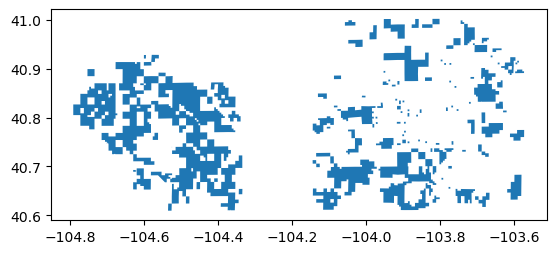

In [11]:
# Find boundary extent of grassland
pawnee_gdf.plot()

In [12]:
pawnee_gdf.total_bounds

array([-104.7914421 ,   40.60956304, -103.57328565,   41.00184675])

In [13]:
bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (pawnee_gdf.total_bounds)

for value in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    print(value)

-105
-104


In [14]:
# Download POLARIS soil data (example with 1 tile)

soil_url_template = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
            "/ph"
            "/mean"
            "/0_5"
            "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")

soil_url = soil_url_template.format(min_lat=40, max_lat=41, min_lon =-105, max_lon =-104)

soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif'

In [15]:
# Loop through to download multiple tiles at once

soil_url_list = []
for value in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    soil_url = soil_url_template.format(
        min_lat=40, max_lat=41, 
        min_lon=value, max_lon=value+1)
    soil_url_list.append(soil_url)
    
soil_url_list

['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-104-103.tif']

In [16]:
#Open raster file
soil_da = rxr.open_rasterio(
    soil_url,
    mask_and_scale=True
    ).squeeze()

soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -104.0 -104.0 -104.0 ... -103.0 -103.0 -103.0
  * y            (y) float64 29kB 41.0 41.0 41.0 41.0 ... 40.0 40.0 40.0 40.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

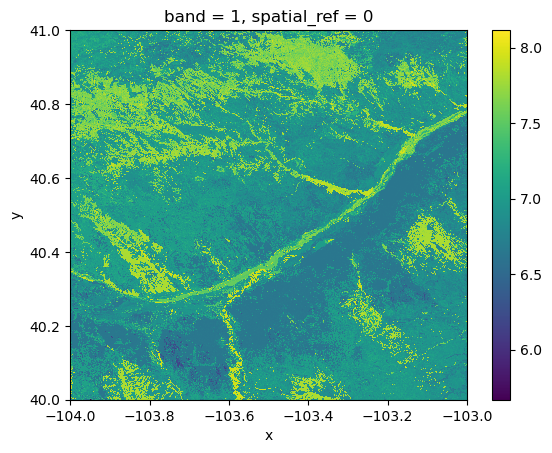

In [17]:
# Plot soil raster
soil_da.plot()

In [18]:
# Create loop for soils data

# Get bounds for each row in geodataframe
bounds_df = subset_grasslands_gdf.bounds
bounds_df

,minx,miny,maxx,maxy
GRASSLANDN,,,,
Pawnee National Grassland,-104.791442,40.609563,-103.573286,41.001847
Comanche National Grassland,-104.059313,36.994609,-102.313615,37.913807


In [19]:
# Check column names
bounds_df.columns

Index(['minx', 'miny', 'maxx', 'maxy'], dtype='object')

In [20]:
# Check data type
type(bounds_df)

pandas.core.frame.DataFrame

In [21]:
# Check index
bounds_df.index

Index(['Pawnee National Grassland', 'Comanche National Grassland'], dtype='object', name='GRASSLANDN')

In [22]:
# Define POLARIS URL template

soil_url_template = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
            "/ph"
            "/mean"
            "/0_5"
            "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")

soil_url_template



'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif'

In [23]:
# Testing 
for row in bounds_df.values:
    print(f"{row[0]}")

for row in bounds_df.values:
    x = ceil(row[0])
    print(x)

-104.79144209999998
-104.05931300999998
-104
-104


In [24]:
# Loop through multiple sites

#Make empty dataframe
soil_urls = []

#Loop through all lat-lon combos and create URLs
for site_name, row in bounds_df.groupby(level=0):
    for lon_value in range(floor(row.minx), ceil(row.maxx)):
        for lat_value in range(floor(row.miny), ceil(row.maxy)):
            soil_url = soil_url_template.format(
                min_lat=lat_value, max_lat=lat_value+1,
                min_lon=lon_value, max_lon=lon_value+1)
            soil_urls.append(soil_url)
display(soil_urls)

C:\Users\alison\AppData\Local\Temp\ipykernel_20924\2566705882.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  for lon_value in range(floor(row.minx), ceil(row.maxx)):
C:\Users\alison\AppData\Local\Temp\ipykernel_20924\2566705882.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  for lat_value in range(floor(row.miny), ceil(row.maxy)):


['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3637_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3738_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3637_lon-104-103.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3738_lon-104-103.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3637_lon-103-102.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3738_lon-103-102.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4142_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-104-103.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4142_lon-104-103.tif']

In [25]:
# Create empty list
soil_das = []

# Loop through each of the soil files
for url in soil_urls:
    # Open the raster file with masking and scaling, and squeeze it to remove single-dimensional axes
    soil_da = rxr.open_rasterio(url, mask_and_scale=True).squeeze()
    
    # Append the opened DataArray to the list
    soil_das.append(soil_da)

soil_das

[<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
 [12960000 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 29kB -105.0 -105.0 -105.0 ... -104.0 -104.0 -104.0
   * y            (y) float64 29kB 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
 [12960000 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 29kB -105.0 -105.0 -105.0 ... -104.0 -104.0 -104.0
   * y            (y) float64 29kB 38.0 38.0 38.0 38.0 ... 37.0 37.0 37.0 37.0
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
 [12960000 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 29kB -104.0 -104.0 -104.0 ... -103.0 -103.0 -103.0
   * y            (y) float64 29kB 37.0 37.0 37.0 37.0 ... 36.0 36.0

In [26]:
# Divide by grassland site
comanche_soil_das = soil_das[:6]
pawnee_soil_das = soil_das[-4:]

In [27]:
# Merge all rasters for each grassland
comanche_merged_soil_das = rxrmerge.merge_arrays(comanche_soil_das)
pawnee_merged_soil_das = rxrmerge.merge_arrays(pawnee_soil_das)

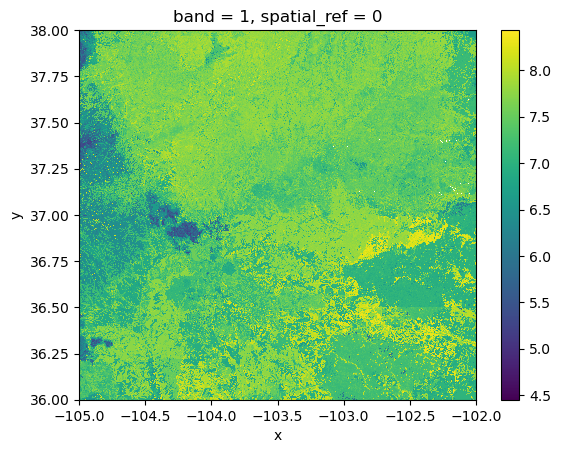

In [28]:
# Plot
comanche_merged_soil_das.plot()

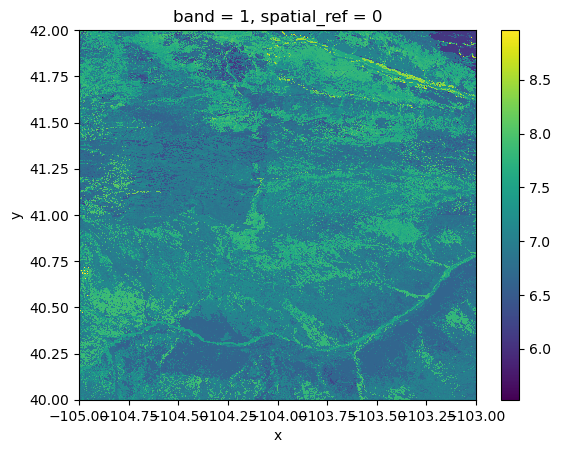

In [29]:
# Plot
pawnee_merged_soil_das.plot()

In [30]:
# Check CRS of soil data
pawnee_merged_soil_das.rio.crs

CRS.from_epsg(4326)

In [31]:
#Convert shapefiles to CRS of soil raster data

pawnee_gdf = pawnee_gdf.to_crs(pawnee_merged_soil_das.rio.crs)
comanche_gdf = comanche_gdf.to_crs(comanche_merged_soil_das.rio.crs)

comanche_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
# pawnee_soil_clipped = pawnee_merged_soil_das.rio.clip(pawnee_gdf)

In [33]:
# Crop to grassland boundaries! (figure out loop)


# cim_bound_box = cim_gdf.total_bounds
# cim_ph_da = cim_merged_ph_da.rio.clip_box(*cim_bound_box)

# paw_bound_box = paw_gdf.total_bounds
# paw_ph_da = paw_merged_ph_da.rio.clip_box(*paw_bound_box)

## MACAv2 Climate Data

In [34]:
# Access MACAv2 data

# Define start and end year
start_year = 2091
end_year = start_year + 4

# save url with year as customizable
maca_url_template = ('http://thredds.northwestknowledge.net:8080/thredds'
                     '/dodsC/MACAV2/CCSM4/macav2metdata_pr_CCSM4_r6i1p1'
                     '_rcp85_{start_year_val}_{end_year_val}_CONUS_monthly.nc')


# Insert start and end year
maca_url = maca_url_template.format(start_year_val = start_year, end_year_val = end_year)

maca_url

'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/CCSM4/macav2metdata_pr_CCSM4_r6i1p1_rcp85_2091_2095_CONUS_monthly.nc'

In [35]:
# Open netCDF
maca_da = xr.open_dataset(maca_url).squeeze().precipitation
maca_da

<xarray.DataArray 'precipitation' (time: 60, lat: 585, lon: 1386)> Size: 195MB
[48648600 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.27 49.31 49.35 49.4
    crs      int32 4B 1
  * lon      (lon) float64 11kB 235.2 235.3 235.3 235.4 ... 292.9 292.9 292.9
  * time     (time) object 480B 2091-01-15 00:00:00 ... 2095-12-15 00:00:00
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [43]:
# Convert longitude to -180 to 180 (from 0 to 360)

#Create conversion function
def convert_longitude(lon):
    """Convert longitude frmo 0-360 to -180-180"""
    return(lon - 360) if lon > 180 else lon

# Apply function to dataset
maca_da = maca_da.assign_coords(
    lon=("lon",[convert_longitude(l) for l in maca_da.lon.values])
)

# Designate names of x and y dimentions
maca_da = maca_da.rio.set_spatial_dims(x_dim='lon', y_dim = 'lat')

maca_da


<xarray.DataArray 'precipitation' (time: 60, lat: 585, lon: 1386)> Size: 195MB
[48648600 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.27 49.31 49.35 49.4
    crs      int32 4B 1
  * time     (time) object 480B 2091-01-15 00:00:00 ... 2095-12-15 00:00:00
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.15 -67.11 -67.06
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [40]:
# Check CRS of dataset
maca_da.rio.crs

CRS.from_wkt('GEOGCS["undefined",DATUM["undefined",SPHEROID["undefined",6378137,298.257223563]],PRIMEM["undefined",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [42]:
# Find bounds of grassland site
bounds = pawnee_gdf.to_crs(maca_da.rio.crs).total_bounds
bounds

array([-104.79144253,   40.6095664 , -103.57328581,   41.00184746])

In [44]:
# Clip to grassland boundary
# * makes bounds read as 4 individual numbers instead of 1 set
maca_da.rio.clip_box(*bounds)

<xarray.DataArray 'precipitation' (time: 60, lat: 11, lon: 30)> Size: 79kB
[19800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 88B 40.6 40.65 40.69 40.73 ... 40.9 40.94 40.98 41.02
  * time     (time) object 480B 2091-01-15 00:00:00 ... 2095-12-15 00:00:00
  * lon      (lon) float64 240B -104.8 -104.7 -104.7 ... -103.6 -103.6 -103.6
    crs      int64 8B 0
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [48]:
# Set up loop to do entire process

#Create conversion function (outside loop)
def convert_longitude(lon):
    """Convert longitude frmo 0-360 to -180-180"""
    return(lon - 360) if lon > 180 else lon

#Make empty list
maca_da_list = []

# Create loop
for site_name, site_gdf in {'pawnee':pawnee_gdf, 'comanche':comanche_gdf}.items():
    for variable in ['pr']:
        for start_year in [2091, 2006]:
            end_year = start_year + 4
            maca_url = ('http://thredds.northwestknowledge.net:8080/thredds'
                     f'/dodsC/MACAV2/CCSM4/macav2metdata_{variable}_CCSM4_r6i1p1'
                     f'_rcp85_{start_year}_{end_year}_CONUS_monthly.nc')

            maca_da = xr.open_dataset(maca_url).squeeze().precipitation

            bounds = site_gdf.to_crs(maca_da.rio.crs).total_bounds

            maca_da = maca_da.assign_coords(
                lon=("lon",[convert_longitude(l) for l in maca_da.lon.values]))

            maca_da = maca_da.rio.set_spatial_dims(x_dim='lon', y_dim = 'lat')

            maca_da = maca_da.rio.clip_box(*bounds)

            maca_da_list.append(dict(
                site_name = site_name,
                variable = variable,
                start_year = start_year,
                da = maca_da))

maca_df = pd.DataFrame(maca_da_list)
maca_df

,site_name,variable,start_year,da
0,pawnee,pr,2091,[[[<xarray.DataArray 'precipitation' ()> Size:...
1,pawnee,pr,2006,[[[<xarray.DataArray 'precipitation' ()> Size:...
2,comanche,pr,2091,[[[<xarray.DataArray 'precipitation' ()> Size:...
3,comanche,pr,2006,[[[<xarray.DataArray 'precipitation' ()> Size:...


## Elevation Data